In [296]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from yellowbrick.regressor import PredictionError
from sklearn.ensemble import RandomForestRegressor

In [297]:
dataset = pd.read_csv("2023_Precios_Casas_RM.csv")
dataset=dataset.drop(['id','Realtor','Ubicacion','Price_USD','Price_CLP'], axis=1)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7779 entries, 0 to 7778
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price_UF    7779 non-null   int64  
 1   Comuna      7779 non-null   object 
 2   Dorms       7779 non-null   int64  
 3   Baths       7714 non-null   float64
 4   Built Area  7533 non-null   float64
 5   Total Area  7571 non-null   float64
 6   Parking     5489 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 425.5+ KB


In [298]:
dataset.isna().sum()

Price_UF         0
Comuna           0
Dorms            0
Baths           65
Built Area     246
Total Area     208
Parking       2290
dtype: int64

In [299]:
dataset = dataset.dropna().reset_index(drop=True)


In [300]:
#Como medida de seguridad, eliminalos las filas duplicadas.
dataset = dataset.drop_duplicates().reset_index(drop=True)


In [301]:
dataset.isna().sum()

Price_UF      0
Comuna        0
Dorms         0
Baths         0
Built Area    0
Total Area    0
Parking       0
dtype: int64

Ordenar por Precio_UF

In [302]:
dataset = dataset.rename(columns = {'Built Area' : 'built_Area', 'Total Area' : 'total_Area'})
dataset = dataset.sort_values(by="Price_UF").reset_index(drop=True)


Eliminamos precios con valores extremadamente bajos

In [303]:
dataset['Price_UF'].describe()

count      5091.000000
mean      10761.859360
std       11252.364284
min           0.000000
25%        3512.000000
50%        6300.000000
75%       14500.000000
max      155000.000000
Name: Price_UF, dtype: float64

In [304]:
dataset[dataset['Price_UF']>90000]

,Price_UF,Comuna,Dorms,Baths,built_Area,total_Area,Parking
5087,95000,Colina,6,8.0,1046.0,4820.0,16.0
5088,105000,LasCondes,5,7.0,460.0,4925.0,8.0
5089,135000,LasCondes,10,12.0,2400.0,5061.0,15.0
5090,155000,LasCondes,4,3.0,140.0,160.0,2.0


In [305]:
dataset = dataset.drop(dataset[dataset['Price_UF']>90000].index).reset_index(drop=True)
dataset

,Price_UF,Comuna,Dorms,Baths,built_Area,total_Area,Parking
0,0,PuenteAlto,3,3.0,90.0,183.0,1.0
1,0,Talagante,2,1.0,80.0,160.0,2.0
2,0,LaFlorida,3,2.0,127.0,300.0,2.0
3,0,Pudahuel,3,3.0,100.0,199.0,2.0
4,0,Colina,5,4.0,220.0,5000.0,4.0
...,...,...,...,...,...,...,...
5082,80000,LasCondes,5,6.0,650.0,2250.0,6.0
5083,80000,Vitacura,6,6.0,720.0,5048.0,10.0
5084,88000,LasCondes,7,5.0,1477.0,4443.0,20.0
5085,90000,Vitacura,6,5.0,450.0,5000.0,8.0


In [306]:
dataset[dataset['Price_UF'] < 1000]

,Price_UF,Comuna,Dorms,Baths,built_Area,total_Area,Parking
0,0,PuenteAlto,3,3.0,90.0,183.0,1.0
1,0,Talagante,2,1.0,80.0,160.0,2.0
2,0,LaFlorida,3,2.0,127.0,300.0,2.0
3,0,Pudahuel,3,3.0,100.0,199.0,2.0
4,0,Colina,5,4.0,220.0,5000.0,4.0
5,0,Pudahuel,4,3.0,235.0,365.0,2.0
6,0,Santiago,4,3.0,82.0,140.0,4.0
7,0,Santiago,4,2.0,124.0,167.0,2.0
8,0,Providencia,3,2.0,229.0,248.0,2.0
9,0,Maipú,3,1.0,60.0,60.0,1.0


In [307]:

dataset= dataset.loc[dataset['Price_UF'] > 1000 ]
print(dataset.shape)
dataset=dataset.reset_index(drop=True)
dataset


(5062, 7)


,Price_UF,Comuna,Dorms,Baths,built_Area,total_Area,Parking
0,1040,Melipilla,3,1.0,84.0,1050.0,2.0
1,1040,SanBernardo,2,1.0,42.0,42.0,2.0
2,1096,LaPintana,3,1.0,63.0,49.0,1.0
3,1124,Peñaflor,2,1.0,50.0,25.0,10.0
4,1180,LaPintana,1,1.0,48.0,102.0,1.0
...,...,...,...,...,...,...,...
5057,80000,LasCondes,5,6.0,650.0,2250.0,6.0
5058,80000,Vitacura,6,6.0,720.0,5048.0,10.0
5059,88000,LasCondes,7,5.0,1477.0,4443.0,20.0
5060,90000,Vitacura,6,5.0,450.0,5000.0,8.0


In [308]:
dataset['Price_UF'].describe()

count     5062.000000
mean     10726.299091
std      10791.616469
min       1040.000000
25%       3569.750000
50%       6360.000000
75%      14500.000000
max      90000.000000
Name: Price_UF, dtype: float64

Analisis de la caracteristica 'Bath' (baños)

In [309]:
dataset['Baths'].value_counts()

Baths
2.0     1455
3.0     1374
1.0      976
4.0      736
5.0      327
6.0      116
7.0       51
8.0       15
9.0        6
11.0       2
21.0       1
13.0       1
12.0       1
29.0       1
Name: count, dtype: int64

In [310]:
dataset['Baths'].describe()

count    5062.000000
mean        2.748123
std         1.463638
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        29.000000
Name: Baths, dtype: float64

In [311]:
dataset[dataset['Baths'] > 7]

,Price_UF,Comuna,Dorms,Baths,built_Area,total_Area,Parking
431,2220,Quilicura,2,11.0,47.0,89.0,1.0
2198,5058,LoPrado,8,8.0,139.0,282.0,3.0
2577,6600,Colina,3,21.0,94.0,345.0,2.0
2684,7024,Conchalí,9,9.0,190.0,190.0,1.0
3108,9500,Colina,13,13.0,350.0,350.0,6.0
3827,14800,Pudahuel,5,8.0,193.0,595.0,4.0
3829,14800,Pudahuel,5,8.0,193.0,597.0,4.0
3872,15000,LasCondes,10,8.0,208.0,283.0,1.0
3873,15000,LaFlorida,16,12.0,389.0,890.0,3.0
4230,18900,Peñalolén,12,8.0,561.0,1860.0,1.0


In [312]:
dataset = dataset.drop(dataset[dataset['Baths'] > 7].index).reset_index(drop=True)
dataset['Baths'].describe()

count    5035.000000
mean        2.709037
std         1.324919
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         7.000000
Name: Baths, dtype: float64

Analisis de la caracteristica 'Dorms'

In [313]:
dataset['Dorms'].value_counts()

Dorms
3     1798
4     1473
5      840
2      359
6      332
7      119
8       50
10      17
1       15
9       15
11       7
12       4
14       3
13       1
15       1
24       1
Name: count, dtype: int64

In [314]:
dataset['Dorms'].describe()

count    5035.000000
mean        3.965839
std         1.401665
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max        24.000000
Name: Dorms, dtype: float64

In [315]:
dataset[dataset['Dorms'] > 8]

,Price_UF,Comuna,Dorms,Baths,built_Area,total_Area,Parking
396,2192,Colina,11,4.0,184.0,184.0,3.0
1219,3512,LoEspejo,12,5.0,170.0,170.0,1.0
1472,3799,LoEspejo,10,5.0,181.0,300.0,3.0
1510,3890,LoPrado,9,2.0,90.0,160.0,1.0
1511,3890,LoPrado,9,2.0,160.0,160.0,2.0
1895,4496,Conchalí,14,2.0,100.0,205.0,1.0
2195,5058,LaCisterna,9,3.0,250.0,273.0,2.0
2549,6462,Conchalí,10,5.0,110.0,470.0,4.0
2603,6743,Maipú,9,4.0,140.0,220.0,1.0
2607,6743,SanMiguel,9,5.0,500.0,330.0,2.0


In [316]:
dataset = dataset.drop(dataset[dataset['Dorms'] >= 12].index).reset_index(drop=True)
dataset['Dorms'].describe()

count    5025.000000
mean        3.945473
std         1.317679
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max        11.000000
Name: Dorms, dtype: float64

Analisis de la caracteristica 'total_Area'

In [317]:
dataset['total_Area'].describe()

count      5025.000000
mean        859.725970
std       10908.252018
min           1.000000
25%         130.000000
50%         220.000000
75%         450.000000
max      678000.000000
Name: total_Area, dtype: float64

In [318]:
dataset = dataset.sort_values(by="total_Area").reset_index(drop=True)
dataset[dataset['total_Area'] > 3000]

,Price_UF,Comuna,Dorms,Baths,built_Area,total_Area,Parking
4791,6743,Pirque,2,2.0,3101.0,3101.0,6.0
4792,15500,Santiago,5,7.0,300.0,3150.0,1.0
4793,22000,Colina,4,4.0,350.0,3151.0,4.0
4794,59200,LasCondes,6,4.0,650.0,3200.0,13.0
4795,16600,LaFlorida,6,7.0,560.0,3290.0,8.0
...,...,...,...,...,...,...,...
5020,6500,Tiltil,5,4.0,200.0,54000.0,10.0
5021,30900,LasCondes,4,4.0,327.0,94929.0,3.0
5022,4468,Independencia,4,2.0,99.0,160000.0,1.0
5023,3653,Santiago,3,1.0,120000.0,300000.0,2.0


In [319]:
dataset = dataset.drop(dataset[dataset['total_Area'] > 3000].index).reset_index(drop=True)
dataset['total_Area'].describe()

count    4791.000000
mean      344.831559
std       381.883926
min         1.000000
25%       129.000000
50%       204.000000
75%       400.000000
max      3000.000000
Name: total_Area, dtype: float64

Eliminamos las filas que tengas Built_Area >= Total_Area

In [320]:
dataset[dataset['built_Area'] >= dataset['total_Area']].count()

Price_UF      596
Comuna        596
Dorms         596
Baths         596
built_Area    596
total_Area    596
Parking       596
dtype: int64

In [321]:
dataset = dataset.drop(dataset[dataset['built_Area'] >= dataset['total_Area']].index).reset_index(drop=True)
dataset['total_Area'].describe()


count    4195.000000
mean      369.342789
std       394.464411
min        49.000000
25%       140.000000
50%       225.000000
75%       430.000000
max      3000.000000
Name: total_Area, dtype: float64

Analisis de la caracteristica Built Area

In [322]:
dataset['built_Area'].describe()

count    4195.000000
mean      152.016687
std       105.279956
min         1.000000
25%        84.000000
50%       120.000000
75%       180.000000
max      1200.000000
Name: built_Area, dtype: float64

In [323]:
dataset[dataset['built_Area'] < 30]

,Price_UF,Comuna,Dorms,Baths,built_Area,total_Area,Parking
4,5200,Providencia,2,2.0,4.0,57.0,1.0
72,2304,Maipú,4,2.0,18.0,70.0,1.0
400,1826,PuenteAlto,3,1.0,15.0,100.0,1.0
1544,2529,Pudahuel,5,1.0,1.0,180.0,1.0


In [324]:
dataset = dataset.drop(dataset[dataset['built_Area'] < 30].index).reset_index(drop=True)
dataset['built_Area'].describe()

count    4191.000000
mean      152.152708
std       105.237792
min        30.000000
25%        84.000000
50%       120.000000
75%       180.000000
max      1200.000000
Name: built_Area, dtype: float64

In [325]:
dataset[dataset['built_Area'] > 500]

,Price_UF,Comuna,Dorms,Baths,built_Area,total_Area,Parking
3644,19300,Santiago,10,4.0,604.0,691.0,6.0
3673,26000,Ñuñoa,11,4.0,567.0,702.0,1269.0
3792,33850,LoBarnechea,7,7.0,520.0,820.0,7.0
3906,21228,Providencia,4,4.0,600.0,1000.0,4.0
3914,48000,Vitacura,7,7.0,544.0,1001.0,3.0
3919,48000,Vitacura,5,5.0,628.0,1003.0,5.0
3963,18095,LasCondes,6,7.0,800.0,1092.0,6.0
3968,48999,LoBarnechea,7,6.0,670.0,1100.0,4.0
3971,35000,LasCondes,5,4.0,590.0,1100.0,4.0
3994,55000,LoBarnechea,8,7.0,690.0,1159.0,2.0


In [326]:
dataset = dataset.drop(dataset[dataset['built_Area'] > 500].index).reset_index(drop=True)
dataset['built_Area'].describe()

count    4132.000000
mean      145.286060
std        87.725585
min        30.000000
25%        84.000000
50%       120.000000
75%       178.250000
max       500.000000
Name: built_Area, dtype: float64

Analisis de la caracteristica 'Parking'

In [327]:
print(dataset['Parking'].value_counts())


Parking
2.0     1547
1.0     1156
3.0      689
4.0      347
5.0      169
6.0      127
8.0       32
7.0       31
10.0      15
11.0       6
20.0       3
14.0       3
9.0        2
12.0       2
22.0       1
18.0       1
15.0       1
Name: count, dtype: int64


In [328]:
print(dataset['Parking'].describe())

count    4132.000000
mean        2.468538
std         1.688593
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        22.000000
Name: Parking, dtype: float64


In [329]:
dataset = dataset.drop(dataset[dataset['Parking'] >= 10].index).reset_index(drop=True)
dataset['Parking'].describe()

count    4100.000000
mean        2.390976
std         1.413028
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         9.000000
Name: Parking, dtype: float64

In [330]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price_UF    4100 non-null   int64  
 1   Comuna      4100 non-null   object 
 2   Dorms       4100 non-null   int64  
 3   Baths       4100 non-null   float64
 4   built_Area  4100 non-null   float64
 5   total_Area  4100 non-null   float64
 6   Parking     4100 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 224.3+ KB


Correlacion Entre Variables

In [331]:
correlacion=dataset.drop(['Comuna'], axis=1).corr()
correlacion.info()
correlacion

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Price_UF to Parking
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price_UF    6 non-null      float64
 1   Dorms       6 non-null      float64
 2   Baths       6 non-null      float64
 3   built_Area  6 non-null      float64
 4   total_Area  6 non-null      float64
 5   Parking     6 non-null      float64
dtypes: float64(6)
memory usage: 508.0+ bytes


,Price_UF,Dorms,Baths,built_Area,total_Area,Parking
Price_UF,1.000000,0.450491,0.676339,0.848585,0.747192,0.519699
Dorms,0.450491,1.000000,0.561946,0.588978,0.372670,0.316427
Baths,0.676339,0.561946,1.000000,0.698744,0.511510,0.395900
built_Area,0.848585,0.588978,0.698744,1.000000,0.745578,0.517403
total_Area,0.747192,0.372670,0.511510,0.745578,1.000000,0.559422
Parking,0.519699,0.316427,0.395900,0.517403,0.559422,1.000000


In [332]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price_UF    4100 non-null   int64  
 1   Comuna      4100 non-null   object 
 2   Dorms       4100 non-null   int64  
 3   Baths       4100 non-null   float64
 4   built_Area  4100 non-null   float64
 5   total_Area  4100 non-null   float64
 6   Parking     4100 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 224.3+ KB


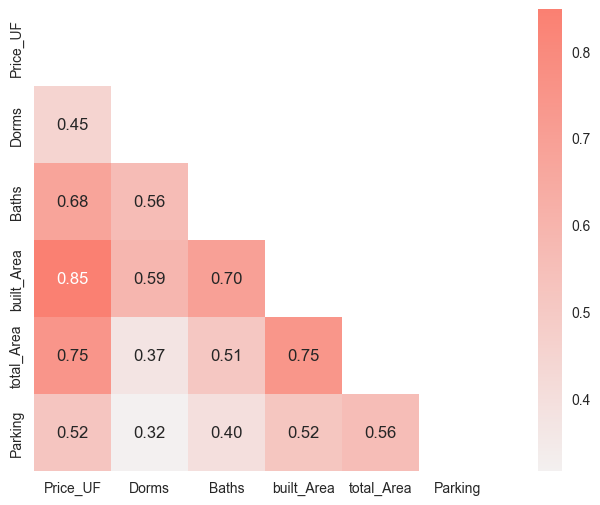

In [333]:
colores = sns.light_palette('salmon', as_cmap=True)
mask = np.triu(correlacion)

with sns.axes_style("white"):
    plt.figure(figsize=(11, 6))
    sns.heatmap(correlacion, cmap=colores, mask=mask, square=True, annot=True, fmt='.2f')
##plt.show()


Aplicamos One-Hot para las variables vategoricas

In [334]:
dataset = pd.get_dummies(dataset, columns=['Comuna'], prefix='Comuna')
dataset.head()

,Price_UF,Dorms,Baths,built_Area,total_Area,Parking,Comuna_Buin,Comuna_CaleradeTango,Comuna_Cerrillos,Comuna_CerroNavia,...,Comuna_SanBernardo,Comuna_SanJoaquín,Comuna_SanJosédeMaipo,Comuna_SanMiguel,Comuna_SanRamón,Comuna_Santiago,Comuna_Talagante,Comuna_Tiltil,Comuna_Vitacura,Comuna_Ñuñoa
0,4620,1,1.0,38.0,49.0,1.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1264,3,2.0,40.0,50.0,1.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1967,2,1.0,45.0,54.0,1.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2276,2,1.0,50.0,55.0,1.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2280,3,1.0,51.0,57.0,1.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [335]:
data = dataset.drop('Price_UF', axis=1)
labels = dataset['Price_UF']
data

,Dorms,Baths,built_Area,total_Area,Parking,Comuna_Buin,Comuna_CaleradeTango,Comuna_Cerrillos,Comuna_CerroNavia,Comuna_Colina,...,Comuna_SanBernardo,Comuna_SanJoaquín,Comuna_SanJosédeMaipo,Comuna_SanMiguel,Comuna_SanRamón,Comuna_Santiago,Comuna_Talagante,Comuna_Tiltil,Comuna_Vitacura,Comuna_Ñuñoa
0,1,1.0,38.0,49.0,1.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,3,2.0,40.0,50.0,1.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,1.0,45.0,54.0,1.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2,1.0,50.0,55.0,1.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3,1.0,51.0,57.0,1.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4095,5,4.0,253.0,2900.0,8.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4096,5,4.0,300.0,2900.0,6.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4097,5,5.0,300.0,3000.0,2.0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4098,3,2.0,108.0,3000.0,3.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Separacion de los datos

In [336]:
x_train,x_test,y_train,y_test=train_test_split(data, labels, test_size=0.2)

Entrenamiento con Regrasion Linear

In [337]:
model_lineal = LinearRegression()
model_lineal.fit(x_train, y_train)

LinearRegression()

% Resultado


In [338]:
model_lineal.score(x_test,y_test)

0.864465195570057

In [339]:
y_pred = model_lineal.predict(x_test)

c:\Users\nicol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


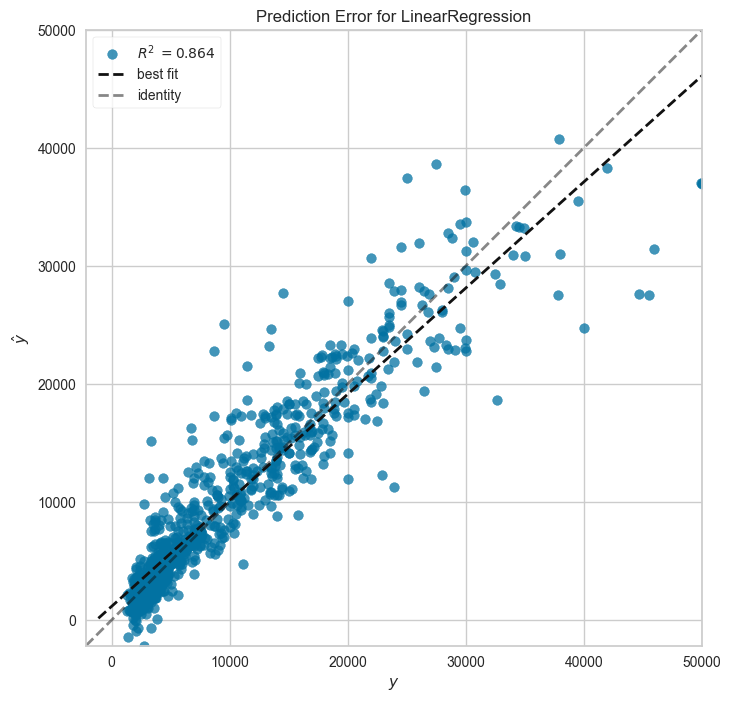

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [340]:
fig, ax = plt.subplots(figsize=(8, 8))
pev = PredictionError(model_lineal)
pev.fit(x_train, y_train)
pev.score(x_test, y_test)
pev.poof()

Arbol de decision para Regresion

In [341]:
model_tree = DecisionTreeRegressor()
model_tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [342]:
model_tree.score(x_test,y_test)

0.781938280358208

In [343]:
predicciones = model_tree.predict(x_test)
predicciones

array([ 1956. ,  3723. ,  3175. ,  4507. ,  7024. , 18000. , 11000. ,
        3653. ,  2300. , 24500. ,  3793. ,  2884. , 10400. , 29500. ,
        7300. ,  3835. , 17990. ,  7500. , 23000. ,  2248. ,  6052. ,
        3653. ,  5328. , 14800. ,  5100. , 12930. ,  5850. , 13900. ,
        5500. , 18000. , 16900. ,  4000. , 23500. ,  4390. , 10900. ,
       23500. , 12300. ,  7100. ,  6095. ,  1968.5, 18100. , 35000. ,
       12200. ,  5820. ,  8200. ,  9225. ,  3750. ,  4215. , 26800. ,
       41120. ,  4496. , 23500. ,  4215. ,  3512. ,  3934. ,  4215. ,
       23900. ,  2388. ,  6200. , 13500. ,  7600. ,  9900. ,  6500. ,
        4215. , 22000. ,  2700. , 10300. ,  8390. , 31700. , 14200. ,
       13900. , 24900. ,  5800. ,  4500. ,  2884. ,  9700. , 11990. ,
       14800. , 18000. ,  8000. ,  5479. ,  1967. ,  3950. ,  2304. ,
        3934. , 19500. ,  2290. ,  5479. ,  8429. ,  3934. ,  4496. ,
        7350. ,  8100. ,  2992. , 40000. ,  4215. , 14500. , 29000. ,
        5339. ,  421

c:\Users\nicol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


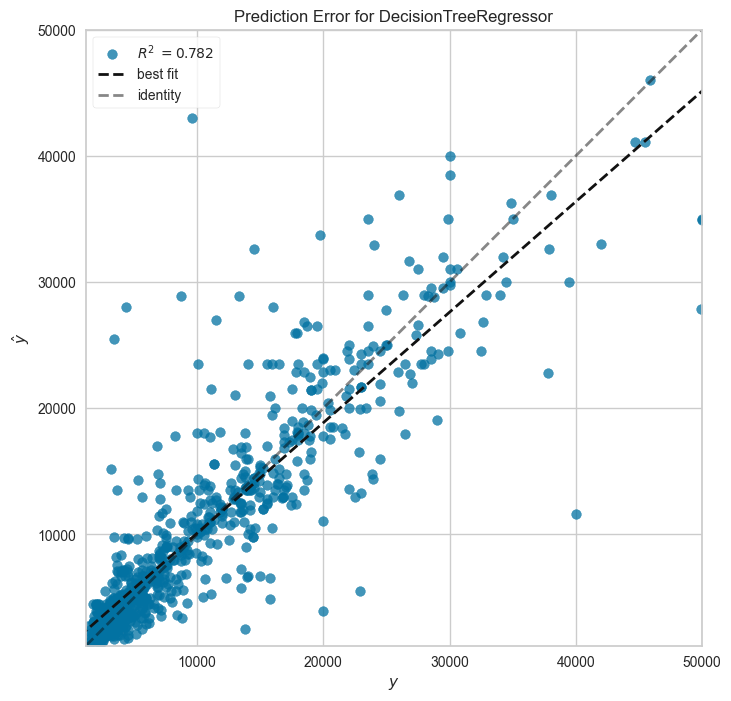

<Axes: title={'center': 'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [344]:
fig, ax = plt.subplots(figsize=(8, 8))
pev = PredictionError(model_tree)
pev.fit(x_train, y_train)
pev.score(x_test, y_test)
pev.poof()

Random Forest Regresion

In [345]:
rf_model = RandomForestRegressor(random_state=42, max_depth=5, n_estimators=10)

In [346]:
rf_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=42)

In [347]:
rf_model.score(x_test,y_test)

0.7759382737967743

In [348]:
prediccion_rf = rf_model.predict(x_test)

c:\Users\nicol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


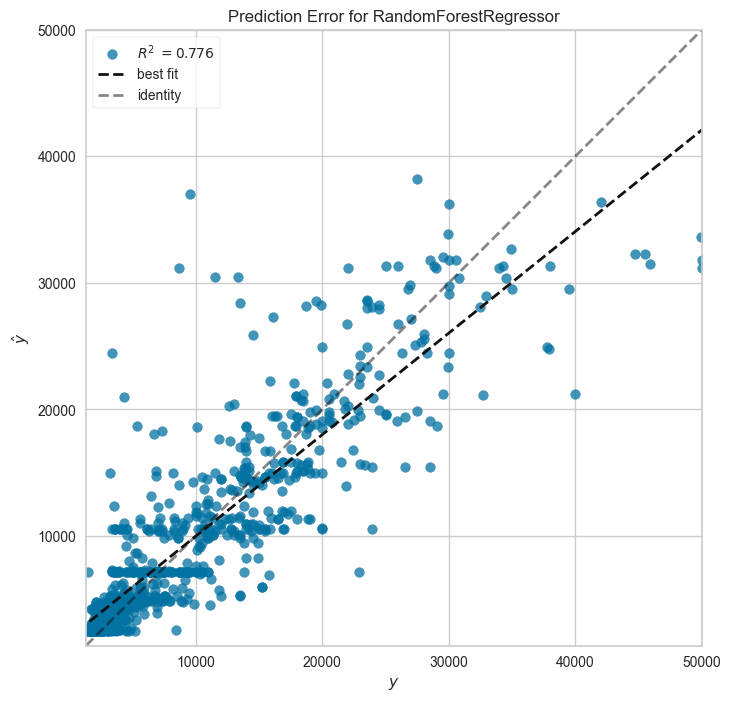

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [349]:
fig, ax = plt.subplots(figsize=(8, 8))
pev = PredictionError(rf_model)
pev.fit(x_train, y_train)
pev.score(x_test, y_test)
pev.poof()